In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('india-population-2020-06-22.csv',
                sep=r'\s*,\s*', engine='python', skiprows=15)
df.head()

,date,Population,Annual % Change
0,1950-12-31,376325200,NaN
1,1951-12-31,382376948,1.61
2,1952-12-31,388799073,1.68
3,1953-12-31,395544369,1.73
4,1954-12-31,402578596,1.78


In [3]:
df.dtypes

date                object
Population           int64
Annual % Change    float64
dtype: object

In [4]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Population':'Population'})
df = df.rename(columns={'date':'Year'})

In [5]:
df['Population'] = df['Population'].apply(lambda x:"{:,}".format(x))

In [6]:
df['Year'] = df['Year'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)
df.head()

,Year,Population,Annual_percent_change
0,1950,"376,325,200",NaN
1,1951,"382,376,948",1.61
2,1952,"388,799,073",1.68
3,1953,"395,544,369",1.73
4,1954,"402,578,596",1.78


In [7]:
df.isnull().sum()

Year                     0
Population               0
Annual_percent_change    1
dtype: int64

In [8]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)

In [9]:
df_pop = df.iloc[:71]
year_list = df_pop['Year'].tolist()

Text(0.5, 1.0, 'Population from 2009 to 2019')

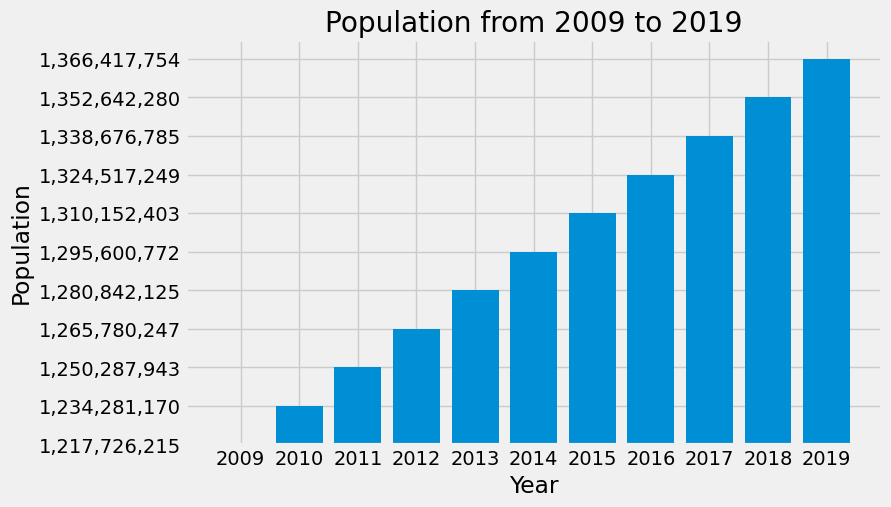

In [10]:
plt.figure(figsize=(8,5))
plt.bar(df_pop['Year'][59:70],df_pop['Population'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population from 2009 to 2019')

Text(0.5, 1.0, 'Annual change rate from 2009 to 2019')

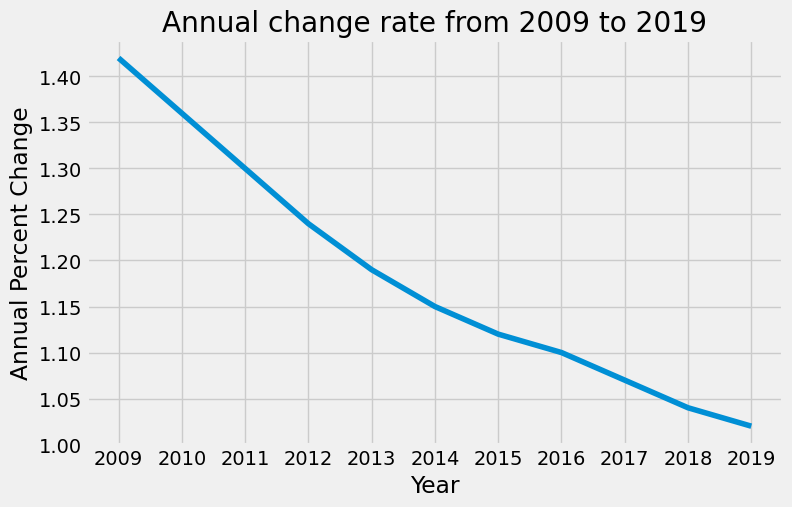

In [11]:
plt.figure(figsize=(8,5))
plt.plot(df_pop['Year'][59:70],df_pop['Annual_percent_change'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Annual Percent Change')
plt.title('Annual change rate from 2009 to 2019')

Text(0.5, 1.0, 'Population from 1999 to 2009')

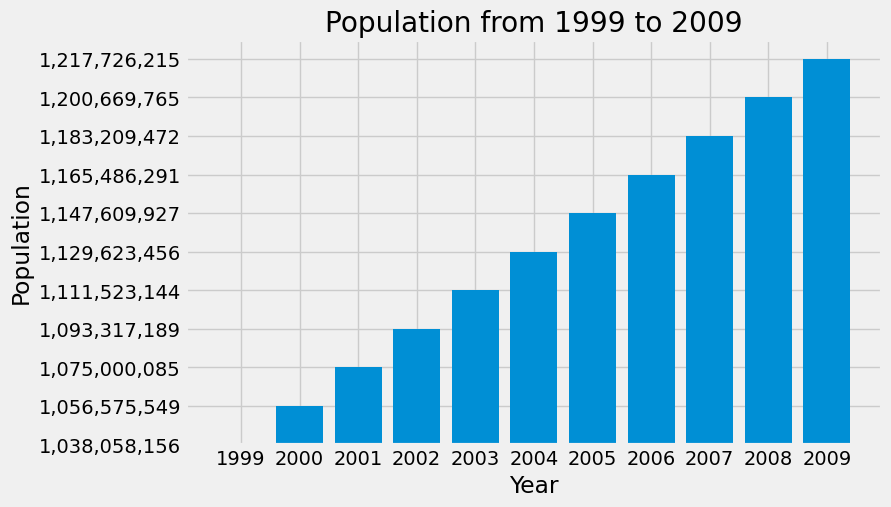

In [12]:
plt.figure(figsize=(8,5))
plt.bar(df_pop['Year'][49:60],df_pop['Population'][49:60])
plt.xticks([1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population from 1999 to 2009')

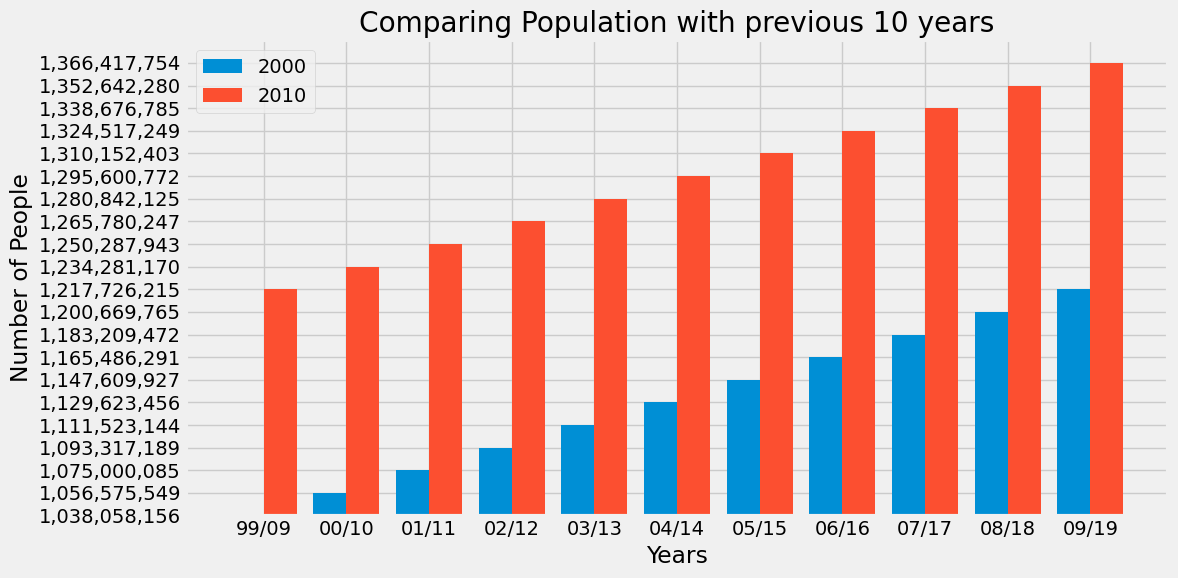

In [14]:
plt.figure(figsize=(12,6))
data_2000 = ('1,038,058,156',
 '1,056,575,549',
 '1,075,000,085',
 '1,093,317,189',
 '1,111,523,144',
 '1,129,623,456',
 '1,147,609,927',
 '1,165,486,291',
 '1,183,209,472',
 '1,200,669,765',
 '1,217,726,215')
data_2010 = ('1,217,726,215',
 '1,234,281,170',
 '1,250,287,943',
 '1,265,780,247',
 '1,280,842,125',
 '1,295,600,772',
 '1,310,152,403',
 '1,324,517,249',
 '1,338,676,785',
 '1,352,642,280',
 '1,366,417,754')
ind = np.arange(11)
width = 0.40
plt.bar(ind, data_2000, width, label = '2000')
plt.bar(ind+width, data_2010, width, label = '2010')
plt.xticks(ind+width/2, ('99/09','00/10','01/11','02/12','03/13','04/14','05/15','06/16','07/17','08/18','09/19'))
plt.title('Comparing Population with previous 10 years')
plt.xlabel('Years')
plt.ylabel('Number of People')
plt.legend()
plt.tight_layout()

In [15]:
df_p_cal = df_pop['Population'].str.replace(',','').astype(int)

In [16]:
print(df_p_cal[49:60].sum())
print(df_p_cal[59:70].sum())

12418799249
14236924943


In [18]:
df = pd.read_csv('india-population-cbr.csv',
                sep=r'\s*,\s*', engine='python')
df.head(5)

,date,Births per 1000 People,Annual % Change
0,31/12/1950,44.175,NaN
1,31/12/1951,43.970,-0.46
2,31/12/1952,43.764,-0.47
3,31/12/1953,43.558,-0.47
4,31/12/1954,43.352,-0.47


In [19]:
df.dtypes

date                       object
Births per 1000 People    float64
Annual % Change           float64
dtype: object

In [20]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Births per 1000 People':'Births_per_1000'})
df = df.rename(columns={'date':'Year'})

In [21]:
df['Year'] = df['Year'].str.split('/').str[-1]
df['Year'] = df['Year'].astype(int)

In [22]:
df.dtypes

Year                       int64
Births_per_1000          float64
Annual_percent_change    float64
dtype: object

In [23]:
df.isnull().sum()

Year                     0
Births_per_1000          0
Annual_percent_change    1
dtype: int64

In [24]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)

In [25]:
df_cbr = df.iloc[:71]
year_list = df_cbr['Year'].tolist()

Text(0.5, 1.0, 'Birth rate from 2009 to 2019')

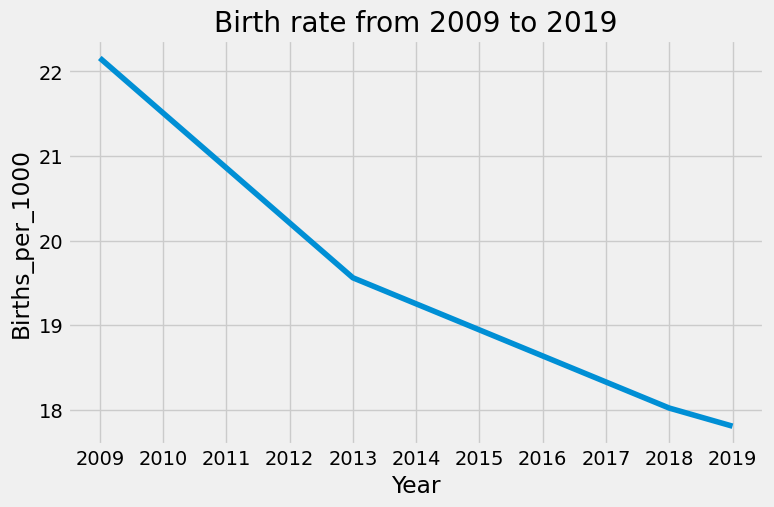

In [26]:
plt.figure(figsize=(8,5))
plt.plot(df_cbr['Year'][59:70],df_cbr['Births_per_1000'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Births_per_1000')
plt.title('Birth rate from 2009 to 2019')

Text(0.5, 1.0, 'Annual change rate from 2009 to 2019')

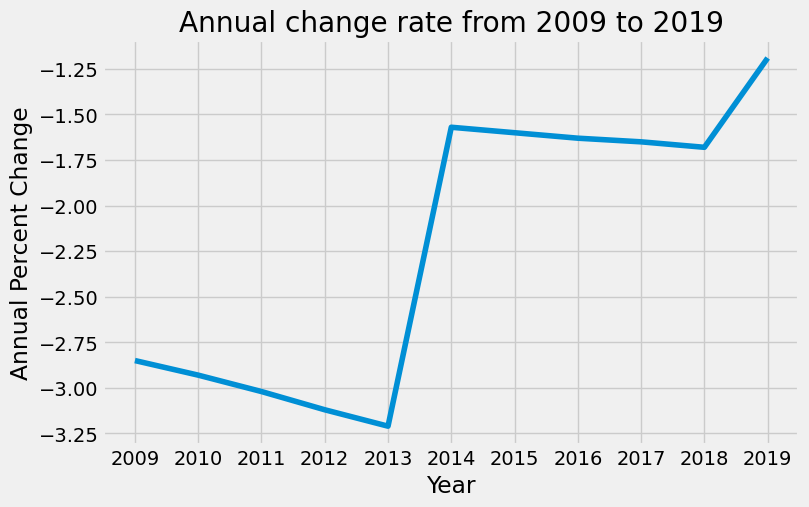

In [27]:
plt.figure(figsize=(8,5))
plt.plot(df_cbr['Year'][59:70],df_cbr['Annual_percent_change'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Annual Percent Change')
plt.title('Annual change rate from 2009 to 2019')

Text(0, 0.5, 'Values')

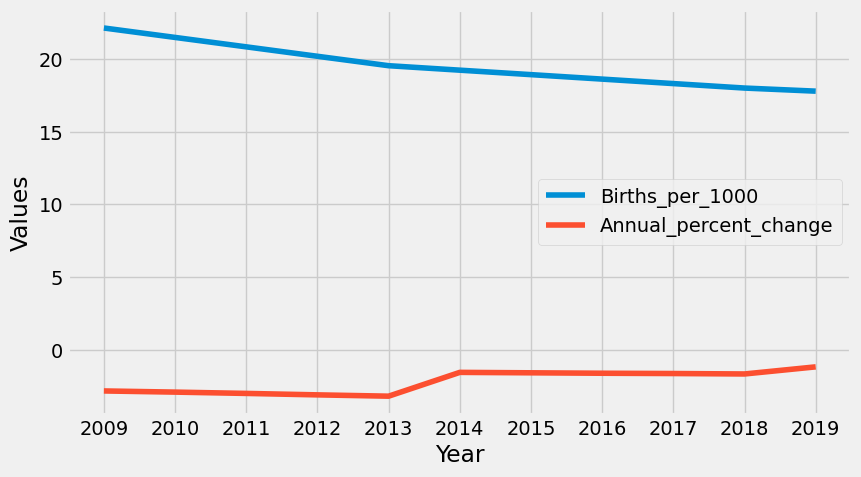

In [28]:
df_plot = df_cbr[['Births_per_1000','Annual_percent_change']][59:70]
ax = df_plot.plot(kind='line', figsize=(9,5))
ax.set_xticks(df_cbr.index[59:70]);
ax.set_xticklabels([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]);
ax.set_xlabel('Year')
ax.set_ylabel('Values')

Text(0.5, 1.0, 'Birth rate from 1999 to 2009')

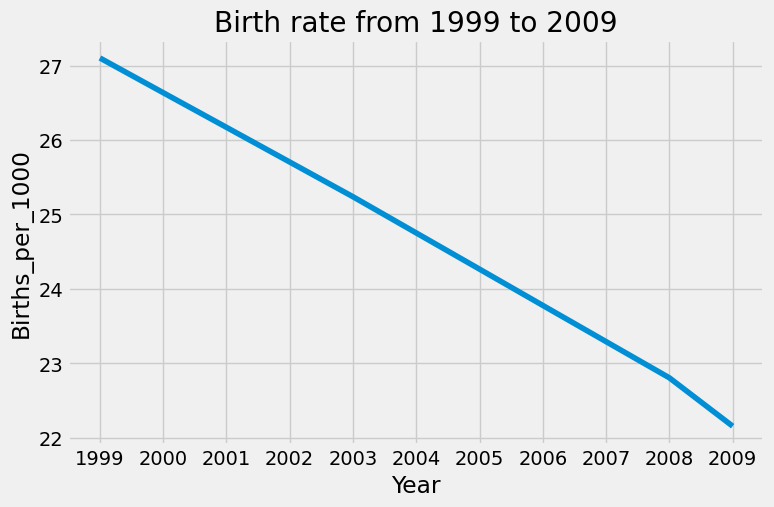

In [29]:
plt.figure(figsize=(8,5))
plt.plot(df_cbr['Year'][49:60],df_cbr['Births_per_1000'][49:60])
plt.xticks([1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
plt.xlabel('Year')
plt.ylabel('Births_per_1000')
plt.title('Birth rate from 1999 to 2009')

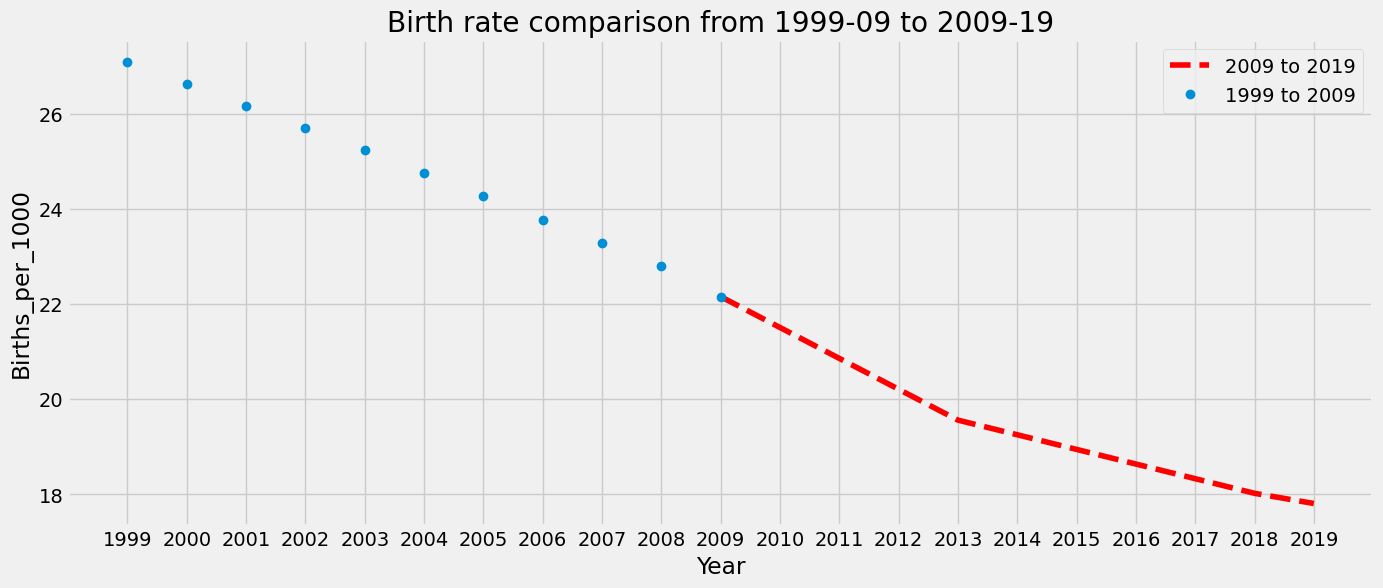

In [30]:
x = [i for i in range(49,70,1)]
y = [i for i in range(1999,2020,1)]
plt.figure(figsize=(15,6))
plt.plot(df_cbr['Births_per_1000'][59:70],'--r', label='2009 to 2019')
plt.plot(df_cbr['Births_per_1000'][49:60],'o',label='1999 to 2009')
plt.xticks(x,y)
plt.xlabel('Year')
plt.ylabel('Births_per_1000')
plt.title('Birth rate comparison from 1999-09 to 2009-19')
plt.legend()

In [31]:
df = pd.read_csv('india-population-death_rate.csv',
                sep=r'\s*,\s*', engine='python', skiprows=15)
df.head()

,date,Deaths per 1000 People,Annual % Change
0,1950-12-31,28.161,NaN
1,1951-12-31,27.584,-2.05
2,1952-12-31,27.008,-2.09
3,1953-12-31,26.432,-2.13
4,1954-12-31,25.856,-2.18


In [32]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Deaths per 1000 People':'Deaths_per_1000'})
df = df.rename(columns={'date':'Year'})

In [33]:
df.dtypes

Year                      object
Deaths_per_1000          float64
Annual_percent_change    float64
dtype: object

In [34]:
df['Year'] = df['Year'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)

In [35]:
df.isnull().sum()

Year                     0
Deaths_per_1000          0
Annual_percent_change    1
dtype: int64

In [36]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)
df['Year'].fillna(0, inplace=True)

In [37]:
df_dr = df.iloc[:71]
year_list = df_dr['Year'].tolist()
df_dr.head()

,Year,Deaths_per_1000,Annual_percent_change
0,1950,28.161,0.00
1,1951,27.584,-2.05
2,1952,27.008,-2.09
3,1953,26.432,-2.13
4,1954,25.856,-2.18


In [38]:
df.dtypes

Year                       int64
Deaths_per_1000          float64
Annual_percent_change    float64
dtype: object

Text(0.5, 1.0, 'Death rate from 2009 to 2019')

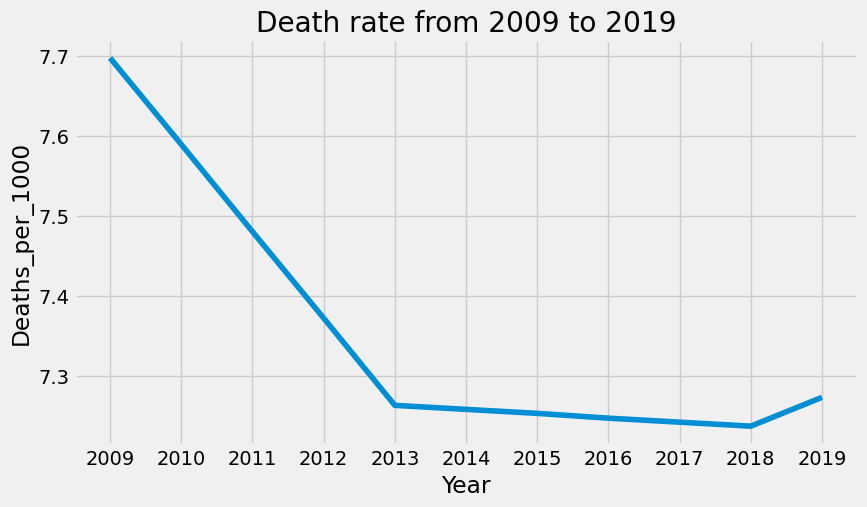

In [39]:
plt.figure(figsize=(9,5))
plt.plot(df_dr['Year'][59:70],df_dr['Deaths_per_1000'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000')
plt.title('Death rate from 2009 to 2019')

Text(0.5, 1.0, 'Annual Rate from 2009 to 2019')

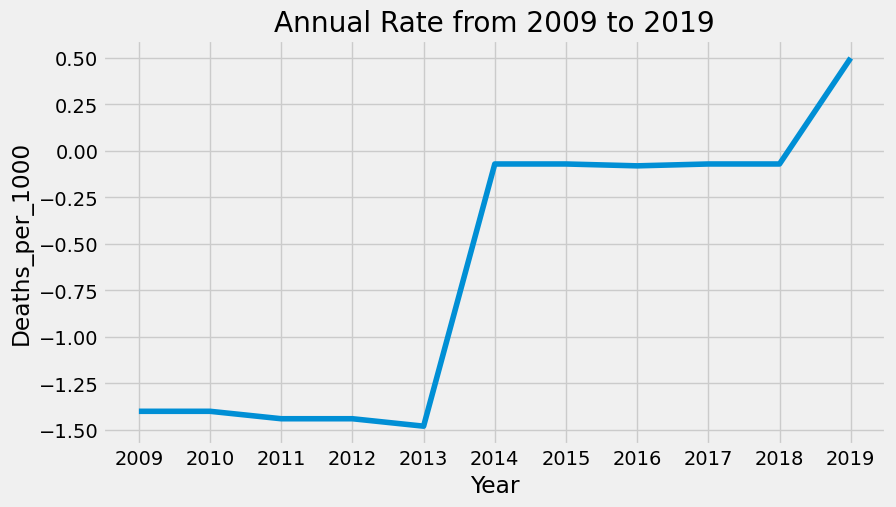

In [40]:
plt.figure(figsize=(9,5))
plt.plot(df_dr['Year'][59:70],df_dr['Annual_percent_change'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000')
plt.title('Annual Rate from 2009 to 2019')

Text(0.5, 1.0, 'Death vs Annual percent change')

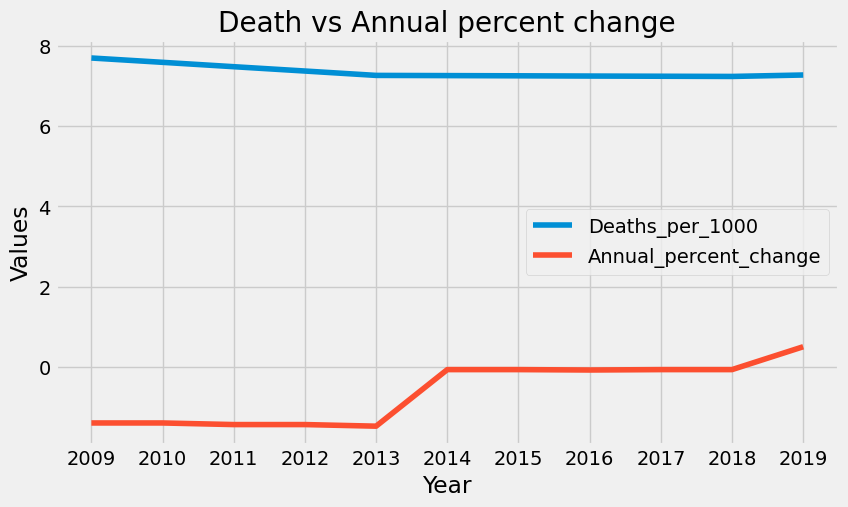

In [41]:
df_plot = df_dr[['Deaths_per_1000','Annual_percent_change']][59:70]
ax = df_plot.plot(kind='line', figsize=(9,5))
ax.set_xticks(df_dr.index[59:70]);
ax.set_xticklabels([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]);
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Death vs Annual percent change')

Text(0.5, 1.0, 'Death rate from 1990 to 2009')

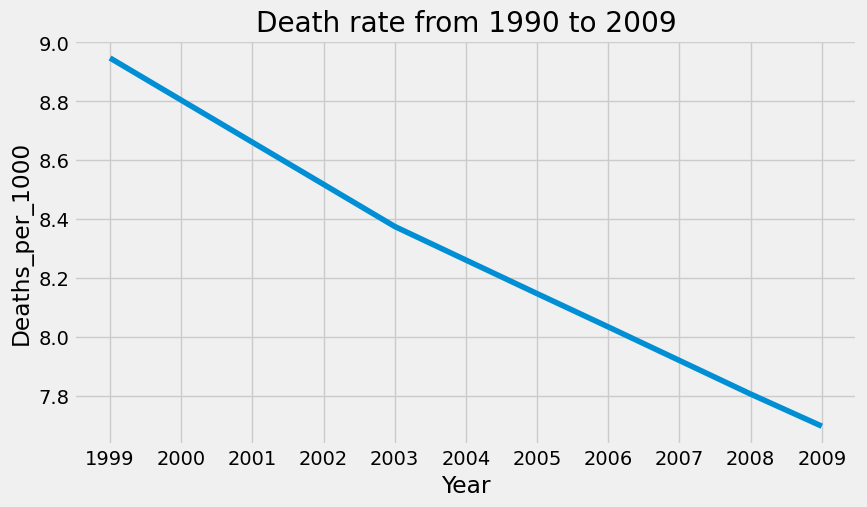

In [42]:
plt.figure(figsize=(9,5))
plt.plot(df_dr['Year'][49:60],df_dr['Deaths_per_1000'][49:60])
plt.xticks([1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000')
plt.title('Death rate from 1990 to 2009')

ValueError: The number of FixedLocator locations (22), usually from a call to set_ticks, does not match the number of labels (21).

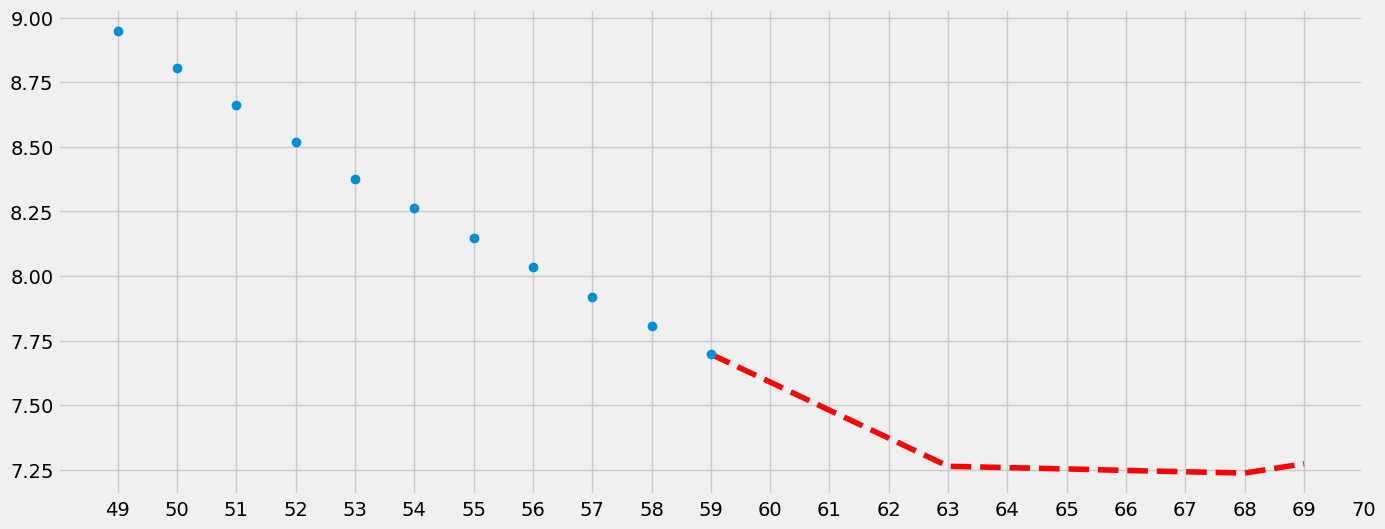

In [43]:
x = [i for i in range(49,71,1)]
y = [i for i in range(1999,2020,1)]
plt.figure(figsize=(15,6))
plt.plot(df_dr['Deaths_per_1000'][59:70],'--r', label='2009 to 2019')
plt.plot(df_dr['Deaths_per_1000'][49:60],'o',label='1999 to 2009')
plt.xticks(x,y)
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000')
plt.legend()
plt.title('Death rate comparison from 1990-09 to 2009-19')

In [44]:
df = pd.read_csv('india-population-fertitltyrate.csv',
                sep=r'\s*,\s*', engine='python', skiprows=15)
df.head()

,date,Births per Woman,Annual % Change
0,1950-12-31,5.907,NaN
1,1951-12-31,5.906,-0.02
2,1952-12-31,5.904,-0.03
3,1953-12-31,5.903,-0.02
4,1954-12-31,5.902,-0.02


In [45]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Births per Woman':'Births_per_woman'})
df = df.rename(columns={'date':'Year'})

In [46]:
df.dtypes

Year                      object
Births_per_woman         float64
Annual_percent_change    float64
dtype: object

In [47]:
df['Year'] = df['Year'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)

In [48]:
df.isnull().sum()

Year                     0
Births_per_woman         0
Annual_percent_change    1
dtype: int64

In [49]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)

In [50]:
df_fr = df.iloc[:71]
df_fr.head()

,Year,Births_per_woman,Annual_percent_change
0,1950,5.907,0.00
1,1951,5.906,-0.02
2,1952,5.904,-0.03
3,1953,5.903,-0.02
4,1954,5.902,-0.02


Text(0.5, 1.0, 'Births per woman from 2009 to 2019')

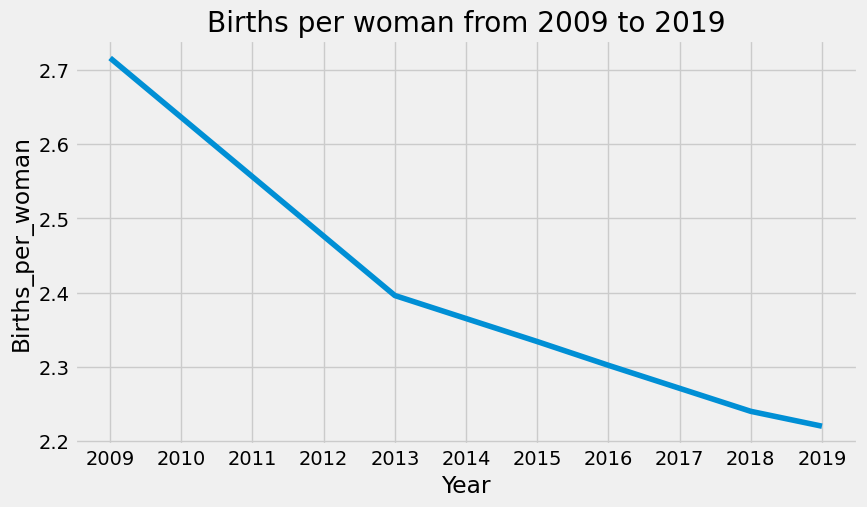

In [51]:
plt.figure(figsize=(9,5))
plt.plot(df_fr['Year'][59:70],df_fr['Births_per_woman'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Births_per_woman')
plt.title('Births per woman from 2009 to 2019')

Text(0.5, 1.0, 'Annual Rate from 2009 to 2019')

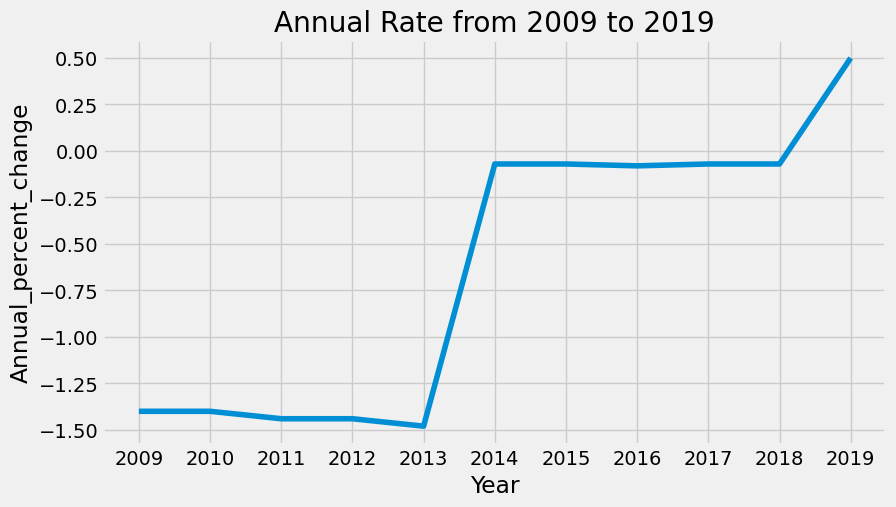

In [52]:
plt.figure(figsize=(9,5))
plt.plot(df_dr['Year'][59:70],df_dr['Annual_percent_change'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Annual_percent_change')
plt.title('Annual Rate from 2009 to 2019')

Text(0.5, 1.0, 'Birth vs Annual percent change')

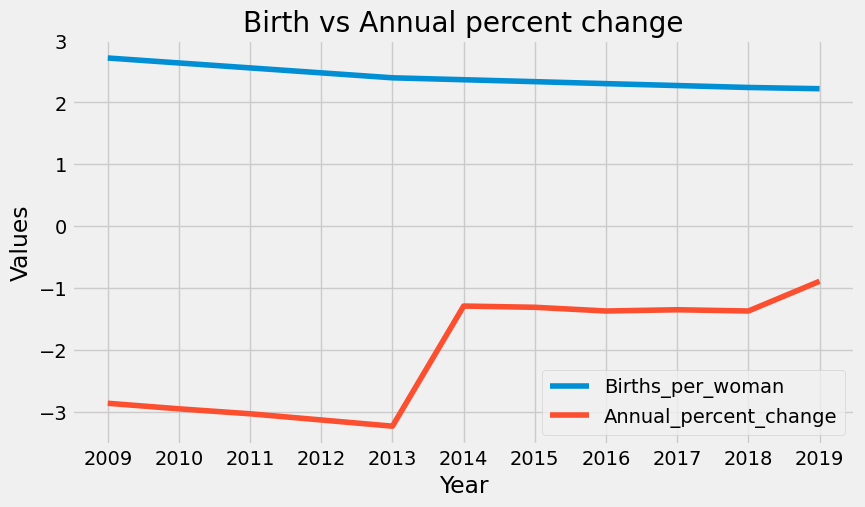

In [53]:
df_plot = df_fr[['Births_per_woman','Annual_percent_change']][59:70]
ax = df_plot.plot(kind='line', figsize=(9,5))
ax.set_xticks(df_fr.index[59:70]);
ax.set_xticklabels([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]);
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Birth vs Annual percent change')

Text(0.5, 1.0, 'Births_per_woman from 1990 to 2009')

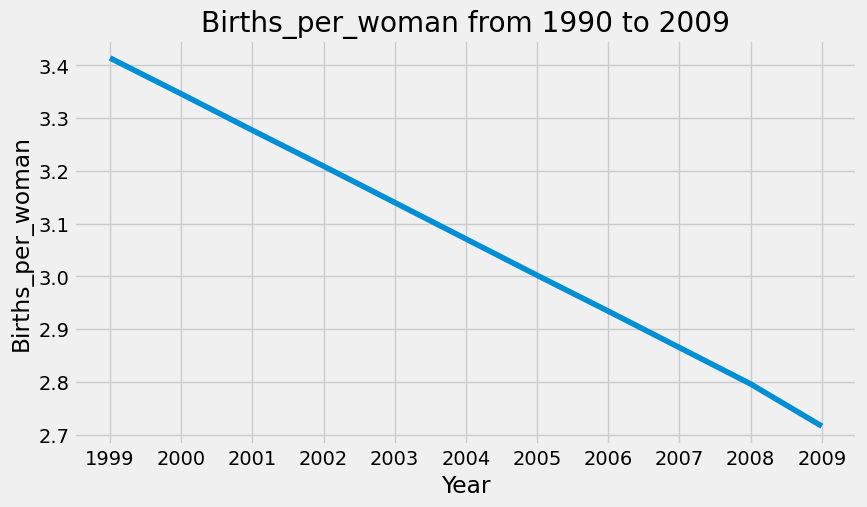

In [54]:
plt.figure(figsize=(9,5))
plt.plot(df_fr['Year'][49:60],df_fr['Births_per_woman'][49:60])
plt.xticks([1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
plt.xlabel('Year')
plt.ylabel('Births_per_woman')
plt.title('Births_per_woman from 1990 to 2009')


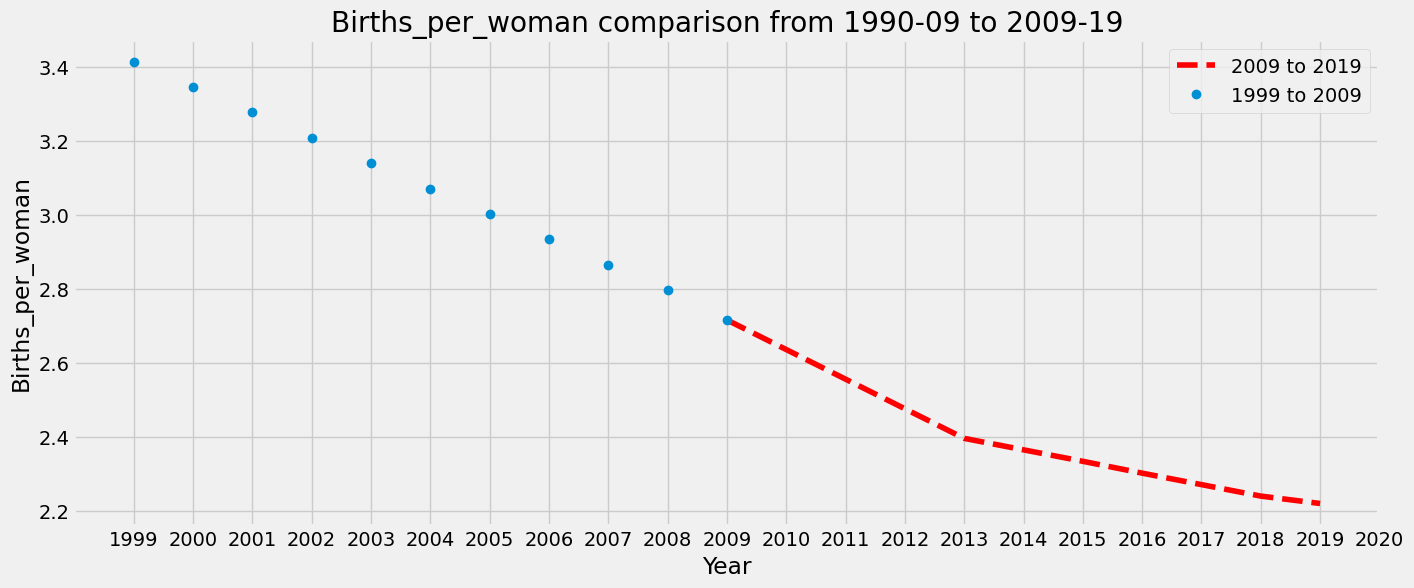

In [57]:
x = [i for i in range(49,71,1)]
y = [i for i in range(1999,2021,1)]
plt.figure(figsize=(15,6))
plt.plot(df_fr['Births_per_woman'][59:70],'--r', label='2009 to 2019')
plt.plot(df_fr['Births_per_woman'][49:60],'o',label='1999 to 2009')
plt.xticks(x, y)
plt.xlabel('Year')
plt.ylabel('Births_per_woman')
plt.legend()
plt.title('Births_per_woman comparison from 1990-09 to 2009-19')
plt.show()


In [58]:
df = pd.read_csv('india-population-infantmr.csv',
                sep=r'\s*,\s*', engine='python', skiprows=15)
df.head()

,date,Deaths per 1000 Live Births,Annual % Change
0,1950-12-31,189.629,NaN
1,1951-12-31,186.737,-1.53
2,1952-12-31,183.846,-1.55
3,1953-12-31,180.954,-1.57
4,1954-12-31,178.062,-1.60


In [59]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Deaths per 1000 Live Births':'Deaths_per_1000_live_births'})
df = df.rename(columns={'date':'Year'})

In [60]:
df.dtypes

Year                            object
Deaths_per_1000_live_births    float64
Annual_percent_change          float64
dtype: object

In [61]:
df['Year'] = df['Year'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)

In [62]:
df.isnull().sum()

Year                           0
Deaths_per_1000_live_births    0
Annual_percent_change          1
dtype: int64

In [63]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)

In [64]:
df_imr = df.iloc[:71]
df_imr.head()

,Year,Deaths_per_1000_live_births,Annual_percent_change
0,1950,189.629,0.00
1,1951,186.737,-1.53
2,1952,183.846,-1.55
3,1953,180.954,-1.57
4,1954,178.062,-1.60


Text(0.5, 1.0, 'Deaths_per_1000_live_births from 2009 to 2019')

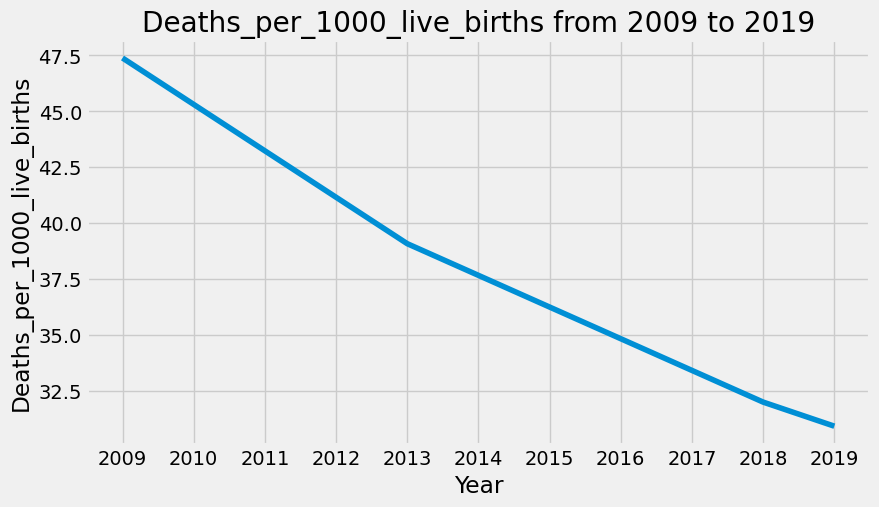

In [65]:
plt.figure(figsize=(9,5))
plt.plot(df_imr['Year'][59:70],df_imr['Deaths_per_1000_live_births'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000_live_births')
plt.title('Deaths_per_1000_live_births from 2009 to 2019')

Text(0.5, 1.0, 'Annual Rate from 2009 to 2019')

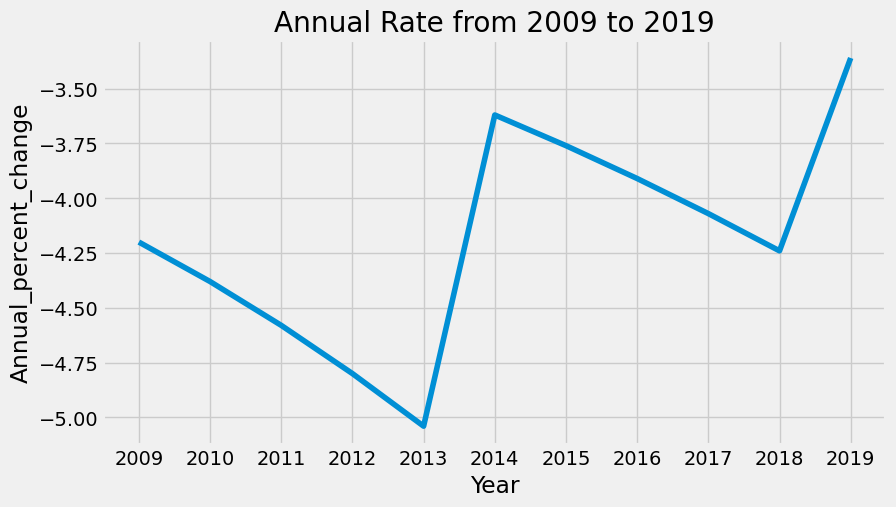

In [66]:
plt.figure(figsize=(9,5))
plt.plot(df_imr['Year'][59:70],df_imr['Annual_percent_change'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Annual_percent_change')
plt.title('Annual Rate from 2009 to 2019')

Text(0.5, 1.0, 'Deaths_per_1000_live_births vs Annual percent change')

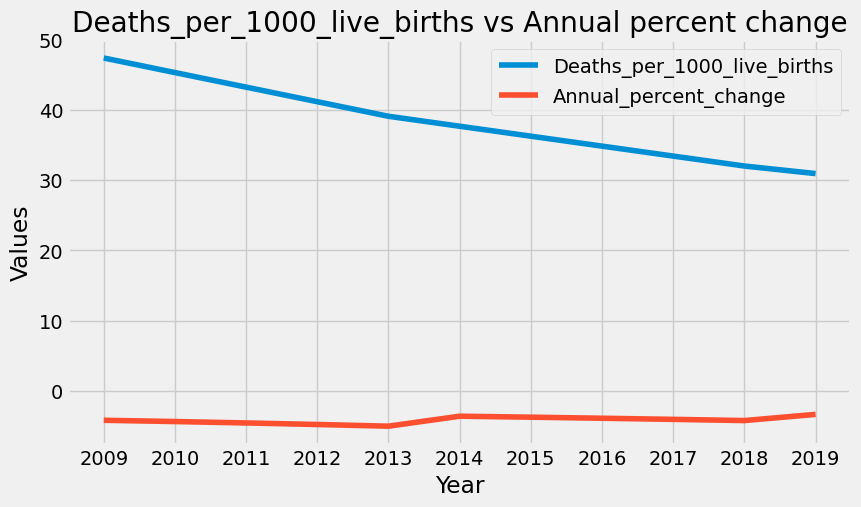

In [67]:
df_plot = df_imr[['Deaths_per_1000_live_births','Annual_percent_change']][59:70]
ax = df_plot.plot(kind='line', figsize=(9,5))
ax.set_xticks(df_imr.index[59:70]);
ax.set_xticklabels([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]);
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Deaths_per_1000_live_births vs Annual percent change')

Text(0.5, 1.0, 'Deaths_per_1000_live_births from 1990 to 2009')

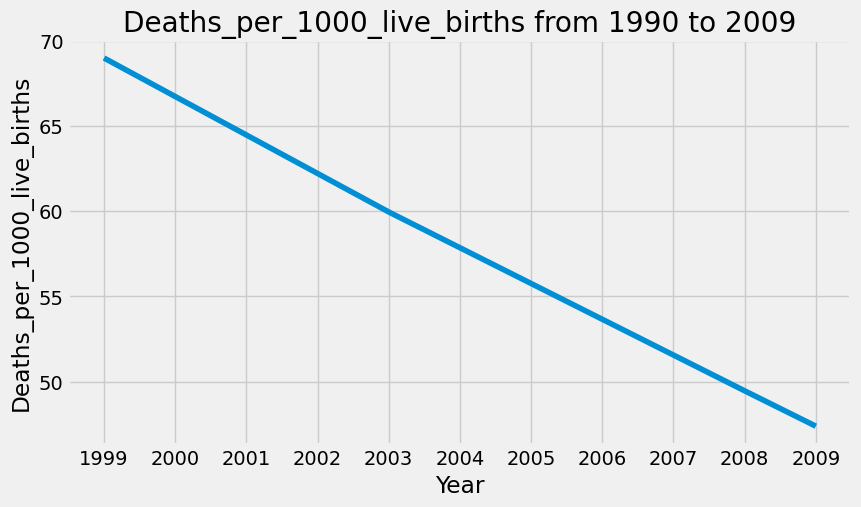

In [68]:
plt.figure(figsize=(9,5))
plt.plot(df_imr['Year'][49:60],df_imr['Deaths_per_1000_live_births'][49:60])
plt.xticks([1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000_live_births')
plt.title('Deaths_per_1000_live_births from 1990 to 2009')

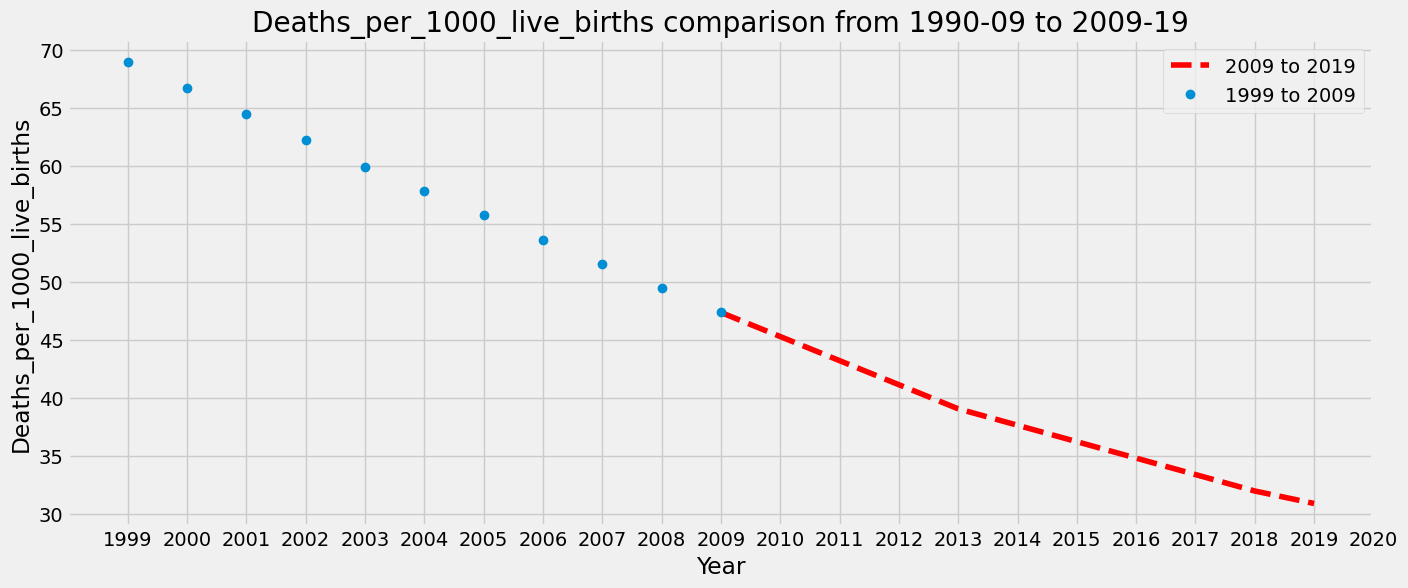

In [70]:
x = [i for i in range(49, 71, 1)]
y = [i for i in range(1999, 2021, 1)]  # Adjusted to include 2020
plt.figure(figsize=(15, 6))
plt.plot(df_imr['Deaths_per_1000_live_births'][59:70], '--r', label='2009 to 2019')
plt.plot(df_imr['Deaths_per_1000_live_births'][49:60], 'o', label='1999 to 2009')
plt.xticks(x, y)
plt.xlabel('Year')
plt.ylabel('Deaths_per_1000_live_births')
plt.legend()
plt.title('Deaths_per_1000_live_births comparison from 1990-09 to 2009-19')
plt.show()


In [71]:
df = pd.read_csv('india-population-lifeexp.csv',
                sep=r'\s*,\s*', engine='python', skiprows=15)
df.head()

,date,Life Expectancy from Birth (Years),Annual % Change
0,1950-12-31,35.21,NaN
1,1951-12-31,35.80,1.68
2,1952-12-31,36.39,1.65
3,1953-12-31,36.98,1.62
4,1954-12-31,37.57,1.60


In [72]:
df = df.rename(columns={'Annual % Change':'Annual_percent_change'})
df = df.rename(columns={'Life Expectancy from Birth (Years)':'Life_expectancy'})
df = df.rename(columns={'date':'Year'})

In [73]:
df.dtypes

Year                      object
Life_expectancy          float64
Annual_percent_change    float64
dtype: object

In [74]:
df['Year'] = df['Year'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)

In [75]:
df.isnull().sum()

Year                     0
Life_expectancy          0
Annual_percent_change    1
dtype: int64

In [76]:
df['Annual_percent_change'] = df['Annual_percent_change'].fillna(0)
df_lf = df.iloc[:71]
df_lf.head()

,Year,Life_expectancy,Annual_percent_change
0,1950,35.21,0.00
1,1951,35.80,1.68
2,1952,36.39,1.65
3,1953,36.98,1.62
4,1954,37.57,1.60


Text(0.5, 1.0, 'Life Expectancy from 2009 to 2019')

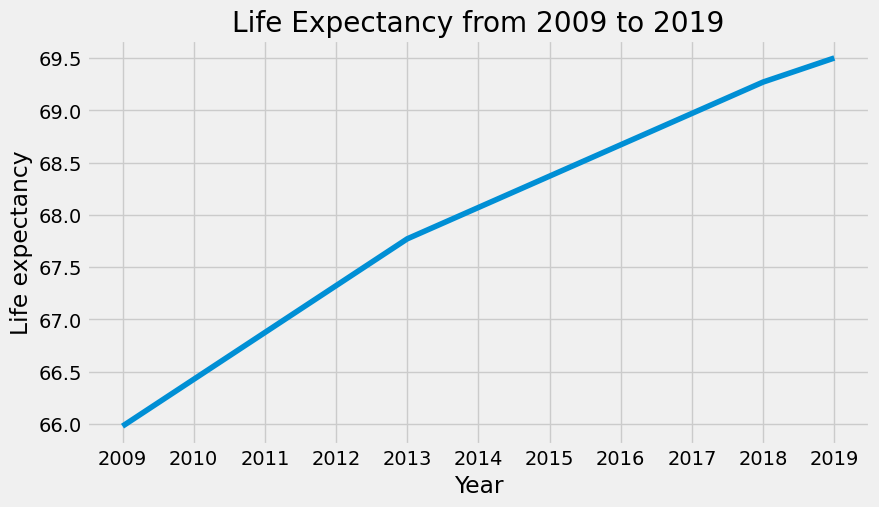

In [77]:
plt.figure(figsize=(9,5))
plt.plot(df_lf['Year'][59:70],df_lf['Life_expectancy'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.title('Life Expectancy from 2009 to 2019')

Text(0.5, 1.0, 'Annual Rate from 2009 to 2019')

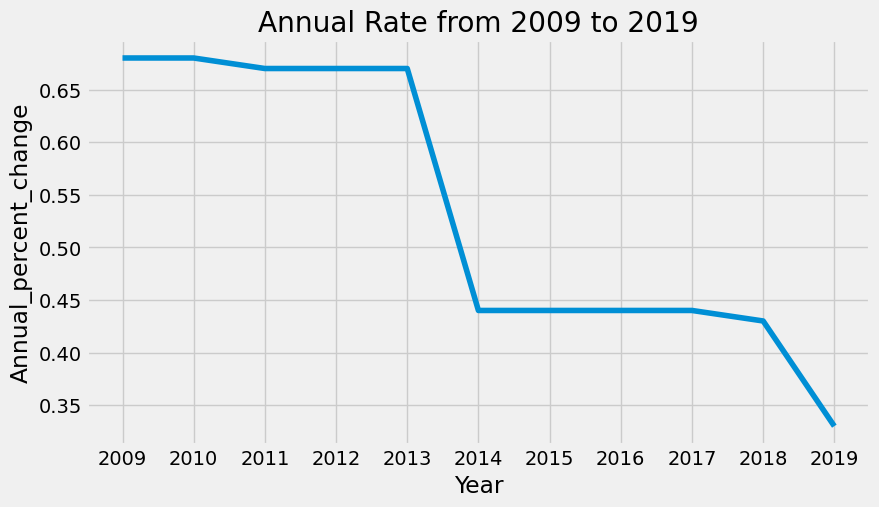

In [78]:
plt.figure(figsize=(9,5))
plt.plot(df_lf['Year'][59:70],df_lf['Annual_percent_change'][59:70])
plt.xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.xlabel('Year')
plt.ylabel('Annual_percent_change')
plt.title('Annual Rate from 2009 to 2019')

Text(0.5, 1.0, 'Life Expectancy vs Annual percent change')

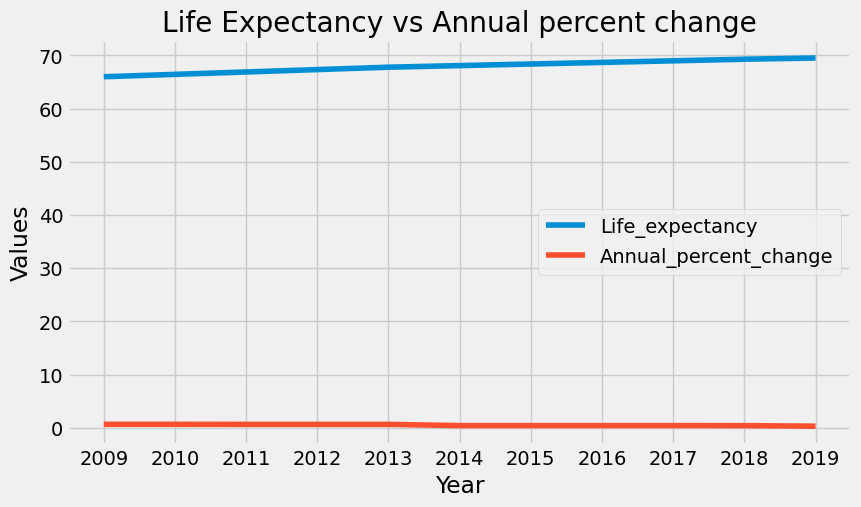

In [79]:
df_plot = df_lf[['Life_expectancy','Annual_percent_change']][59:70]
ax = df_plot.plot(kind='line', figsize=(9,5))
ax.set_xticks(df_imr.index[59:70]);
ax.set_xticklabels([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]);
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Life Expectancy vs Annual percent change')

Text(0.5, 0, 'Year')

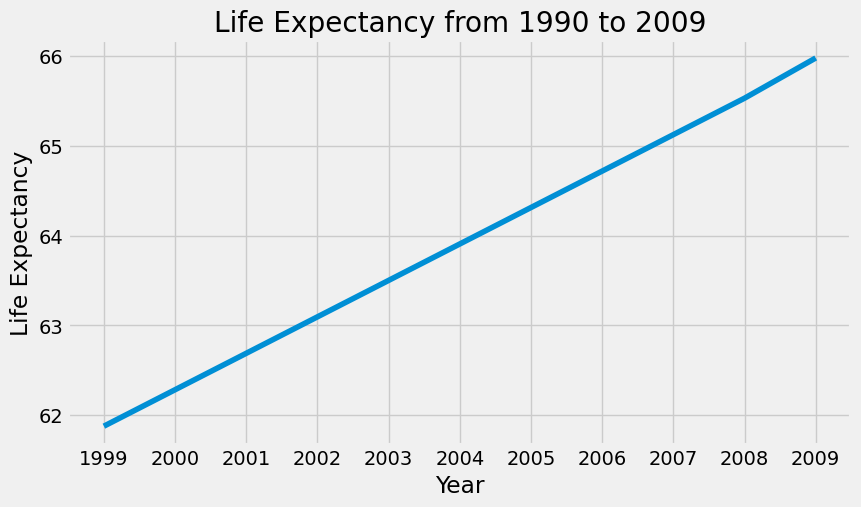

In [80]:
plt.figure(figsize=(9,5))
plt.plot(df_lf['Year'][49:60],df_lf['Life_expectancy'][49:60])
plt.xticks([1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy from 1990 to 2009')
plt.xlabel('Year')

ValueError: The number of FixedLocator locations (22), usually from a call to set_ticks, does not match the number of labels (21).

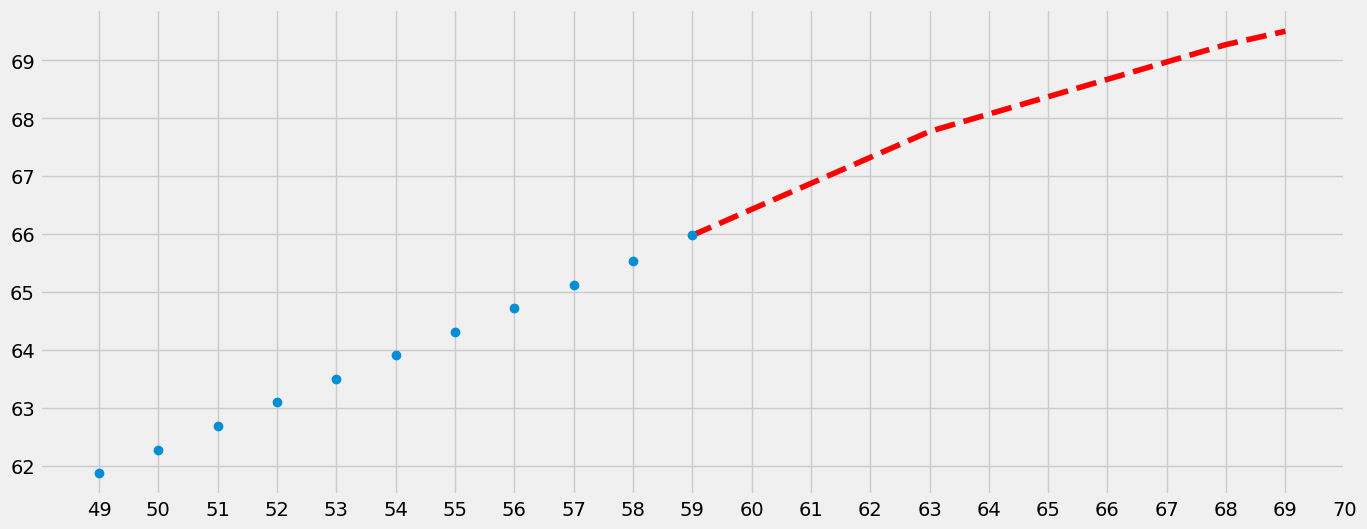

In [85]:
x = [i for i in range(49, 71)]  # Adjusted the upper limit to match the length of y
y = [i for i in range(1999, 2020)]

plt.figure(figsize=(15, 6))
plt.plot(df_lf['Life_expectancy'][59:70], '--r', label='2009 to 2019')
plt.plot(df_lf['Life_expectancy'][49:60], 'o', label='1999 to 2009')
plt.xticks(x, y)
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.legend()
plt.title('Life expectancy comparison from 1990-09 to 2009-19')
plt.show()


In [86]:
df = pd.read_csv('india-suicide-rate.csv',
                sep=r'\s*,\s*', engine='python', skiprows=16)
df


,date,Total,Male,Female
0,31/12/2000,17.40,18.6,16.0
1,31/12/2005,17.60,18.1,17.1
2,31/12/2010,16.50,17.7,15.2
3,31/12/2015,16.50,18.5,14.9
4,31/12/2016,16.30,18.0,14.7
5,31/12/2016,17.95,21.2,14.7
6,31/12/2019,21.10,25.8,16.4


In [87]:
df = df.drop(df.index[4])
df

,date,Total,Male,Female
0,31/12/2000,17.40,18.6,16.0
1,31/12/2005,17.60,18.1,17.1
2,31/12/2010,16.50,17.7,15.2
3,31/12/2015,16.50,18.5,14.9
5,31/12/2016,17.95,21.2,14.7
6,31/12/2019,21.10,25.8,16.4


In [88]:
df = df.rename(columns={'date':'Year'})
df = df.rename(columns={'Total':'Average'})
df = df.rename(columns={'Male':'Male'})
df = df.rename(columns={'Female':'Female'})

In [89]:
df.shape

(6, 4)

In [90]:
df.isnull().sum()

Year       0
Average    0
Male       0
Female     0
dtype: int64

In [91]:
df['Year'] = df['Year'].str.split('/').str[-1]
df['Year'] = df['Year'].astype(int)

In [92]:
df

,Year,Average,Male,Female
0,2000,17.40,18.6,16.0
1,2005,17.60,18.1,17.1
2,2010,16.50,17.7,15.2
3,2015,16.50,18.5,14.9
5,2016,17.95,21.2,14.7
6,2019,21.10,25.8,16.4


Text(0.5, 1.0, 'Male Suicide rate till 2019')

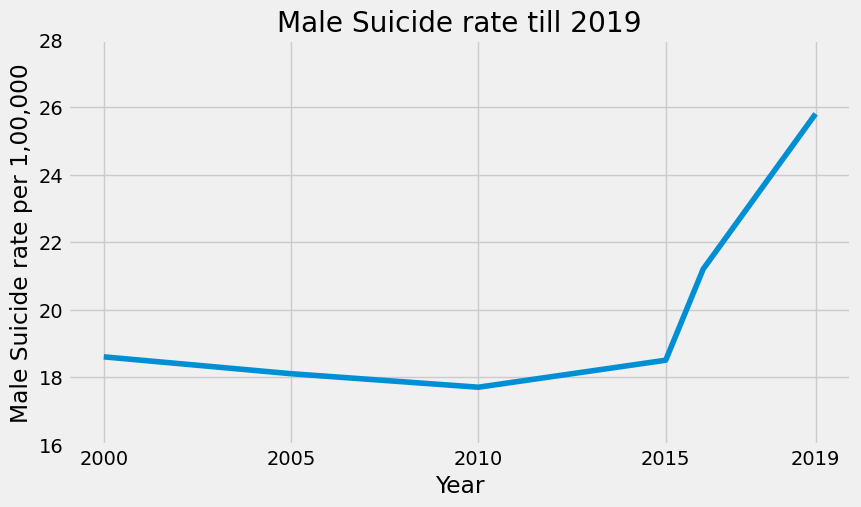

In [93]:
plt.figure(figsize=(9,5))
plt.plot(df['Year'],df['Male'])
plt.xticks([2000,2005,2010,2015,2019])
plt.xlabel('Year')
plt.ylim([16,28])
plt.ylabel('Male Suicide rate per 1,00,000')
plt.title('Male Suicide rate till 2019')

Text(0.5, 1.0, 'Female Suicide rate till 2019')

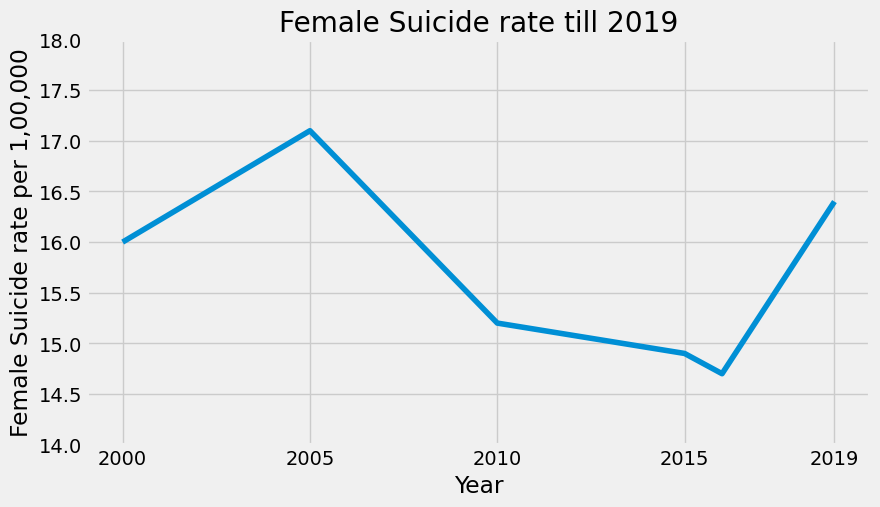

In [94]:
plt.figure(figsize=(9,5))
plt.plot(df['Year'],df['Female'])
plt.xticks([2000,2005,2010,2015,2019])
plt.xlabel('Year')
plt.ylim([14,18])
plt.ylabel('Female Suicide rate per 1,00,000')
plt.title('Female Suicide rate till 2019')

Text(0.5, 1.0, 'Average Suicide rate till 2019')

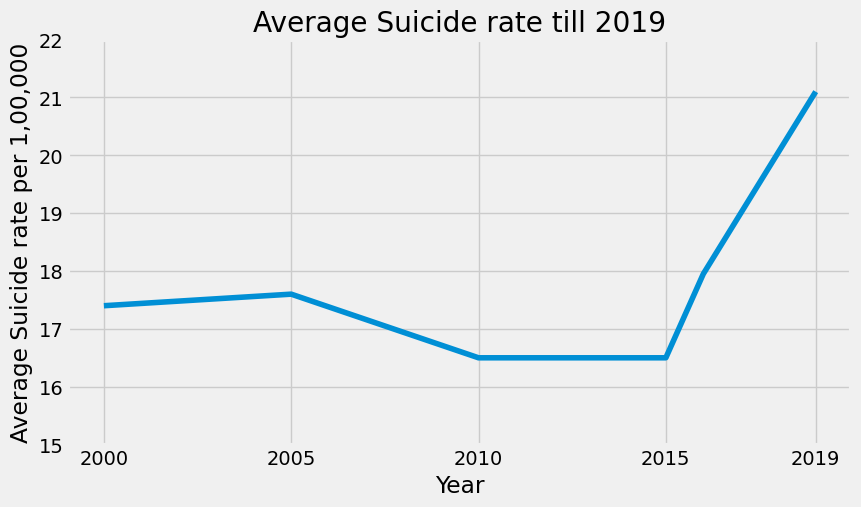

In [95]:
plt.figure(figsize=(9,5))
plt.plot(df['Year'],df['Average'])
plt.xticks([2000,2005,2010,2015,2019])
plt.ylim([15,22])

plt.xlabel('Year')
plt.ylabel('Average Suicide rate per 1,00,000')
plt.title('Average Suicide rate till 2019')

In [96]:
f = []
m = []
y=[]
for i in df['Male']:
    m.append(i)
for i in df['Female']:
    f.append(i)
for i in df['Year']:
    y.append(i)
f = tuple(f)
m = tuple(m)
y = tuple(y)

Text(0.5, 1.0, 'Male vs Female Suicide rate')

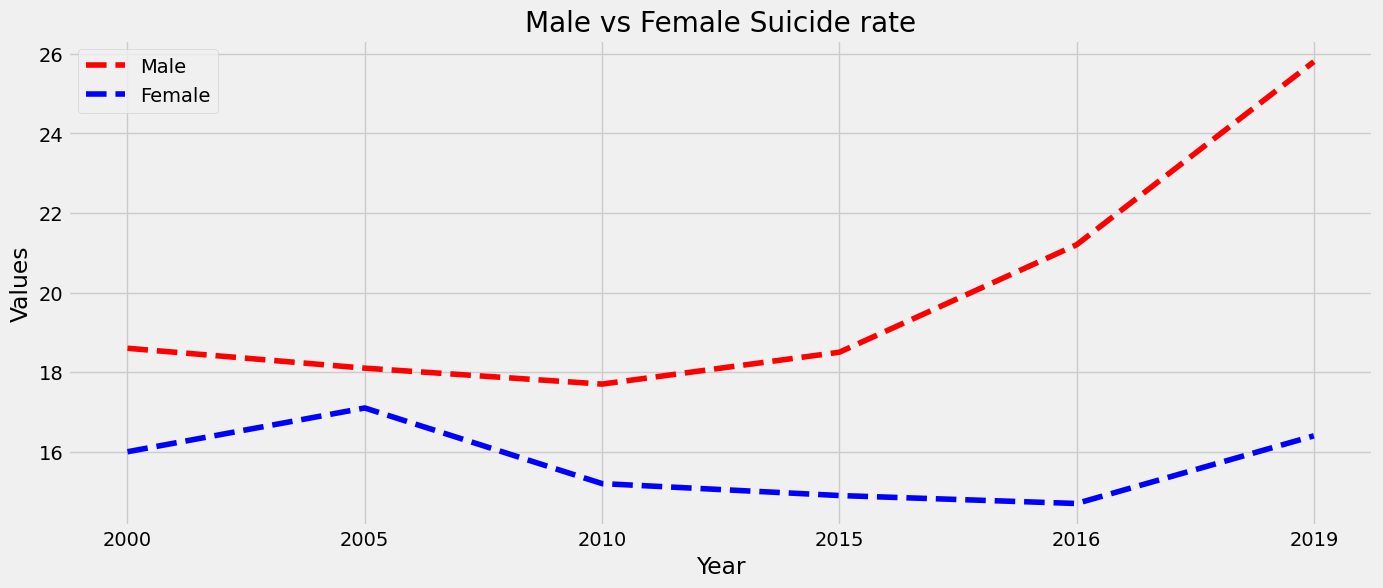

In [97]:
plt.figure(figsize=(15,6))
ax = plt.plot(m,'--r', label='Male')
ax2 = plt.plot(f,'--b',label='Female')

plt.xticks(np.arange(6), ['2000','2005', '2010', '2015', '2016', '2019'])
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.title('Male vs Female Suicide rate')

In [98]:
df

,Year,Average,Male,Female
0,2000,17.40,18.6,16.0
1,2005,17.60,18.1,17.1
2,2010,16.50,17.7,15.2
3,2015,16.50,18.5,14.9
5,2016,17.95,21.2,14.7
6,2019,21.10,25.8,16.4
